# Table of Content <a id='toc'></a>


&nbsp;&nbsp;&nbsp;&nbsp;[1. Fisher's exact test and the Chi-square test](#0)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Fisher's exact test](#1)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Chi-square](#2)

&nbsp;&nbsp;&nbsp;&nbsp;[Exercise 01](#3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2. Kolmogorov-Smirnov test](#4)

&nbsp;&nbsp;&nbsp;&nbsp;[Exercise 02](#5)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3. Bartlett's test - testing variance equality](#6)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4. 1-way anova](#7)

&nbsp;&nbsp;&nbsp;&nbsp;[Exercise 03](#8)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5. Common probability distributions](#9)

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import scipy.stats as stats 
import pandas as pd
import numpy as np

Now that we have seen the basis of statistical hypothesis testing, let's review some of the most used ones.


[back to the toc](#toc)

<br>

# 1. Fisher's exact test and the Chi-square test  <a id='0'></a>

These two tests have for object the association between 2 categorical variables.

Their **null hypothesis** is the absence of association between the two variable.


**Fisher's exact test**, as its name entails, computes a p-value which is exact, even for very low smaple sizes. However it becomes computationnaly complex to compute as the data set size or number of categories gets high.

The **Chi-square test**, in contrast, uses an approximation of the exact p-value which is only valid when samples are big enough. However, it scales well to larger samples sizes and number of categories.


Both tests start from a **contingency table**.

We are going to use as example the historical [Lady tasting tea](https://en.wikipedia.org/wiki/Lady_tasting_tea).

|  | detected as milk before | detected as milk after | marginal sums |
|---|---|---|---|
| **milk before** | 3 | 1 | **4** |
| **milk after** | 1 | 3 | **4** |
| **marginal sums**  | **4** | **4** | **8** |

In our experiment, the lady was able to correctly identify 6 out of 8 cups.



[back to the toc](#toc)

<br>

## 1.1 Fisher's exact test  <a id='1'></a>

The test is based on counting the number of possible tables that show the same maginal sums.

The p-value corresponds to the number of tables 
as or more extreme as the observed one,
divided by the total number of tables.

Given the constraint of keeping the marginal sums, describing the 
number of *correctly detected cups with the milk before* suffices to describe a type of table.


In our case, tables as or more extreme as the observed ones are the one where the number of correctly detected cups with the milk before is :
* 3 : 16 tables :
     * 4 ways of selecting 3 cups with milk before correctly
     * 4 ways of selecting 3 cups with milk after correctly
* 1 : 16 tables :
     * 4 ways of selecting 1 cups with milk before correctly
     * 4 ways of selecting 1 cups with milk after correctly
* 4 : 1 table (1x1)
* 0 : 1 table (1x1)


Given that there is 70 possible tables here, the p-value is $(16+1+1+16)/70 \approx 0.486$

> Note : by defining more extreme tables as the ones where there is as many or more successes than observed, we are effectively performing a 1-sided test.

While it is fun to use combinatorics to compute p-values, scipy has a function for it:

In [2]:
table = [[3,1],[1,3]]

oddsratio , pvalue = stats.fisher_exact(table)
print("Fisher's exact test")
print('\todds ratio:',oddsratio)
print('\tp-value:',pvalue)

Fisher's exact test
	odds ratio: 9.0
	p-value: 0.48571428571428527


The odds ratio corresponds to the product of the row-wise odds-ratio (i.e., number correct guess divided by number of wrong guesses).


[back to the toc](#toc)

<br>

## 1.2 Chi-square  <a id='2'></a>

The Chi-square test is based on an approximation, 
which works best when the expected **number of observations in each cell exceeds 5**.

Nevertheless, we can still compute the test statistic for our *simple* example.

The idea of the test is that under the null hypothesis that the two variables are not linked, the expected values in each of the cells of the table can be deduced from the marginal sums only.

In our case that gives the folowwing expected table:

|  | detected as milk before | detected as milk after | marginal sums |
|---|---|---|---|
| **milk before** | 8x(4/8)x(4/8)=2 | 8x(4/8)x(4/8)=2 | **4** |
| **milk after** | 8x(4/8)x(4/8)=2 | 8x(4/8)x(4/8)=2 | **4** |
| **marginal sums**  | **4** | **4** | **8** |

> Sure, our example is a bit boring here.

Then, the test statistic of the test :

$$T = \sum \frac{(observed-expected)^2}{expected}$$

For our example, 

$$ T = \frac{(3-2)^2}{2} +\frac{(1-2)^2}{2} + \frac{(1-2)^2}{2} +\frac{(3-2)^2}{2} = 2$$


Which is expected to follow a $\chi^2$ (chi-square) distribution with a number of degree of freedom equal to:

$$ df = (number\_of\_columns - 1) * (number\_of\_rows - 1) $$

In our case $df=(2-1)*(2-1)=1$

> Note: this is directly related to the Fisher's exact test where we could describe tables using a single value


In [3]:
chi2,pval , df, expected = stats.chi2_contingency(table , correction=False)
print("Chi-square test")
print('\tchi2:', chi2)
print('\tp-value:', pval)

Chi-square test
	chi2: 2.0
	p-value: 0.15729920705028105


You can see here that the returned p-value is quite different from the one given by Fisher's exact test.

> note that here we use `correction=False` as by default scipoy implementation uses [Yates's correction](https://en.wikipedia.org/wiki/Yates%27s_correction_for_continuity), which is useful when the effectives are low. Try the same lines with the correction to see the difference.



Let's imagine now that we have a many cups and very patient lady so that the contigency table looks like this:

|  | detected as milk before | detected as milk after | marginal sums |
|---|---|---|---|
| **milk before** | 25 | 15 | **40** |
| **milk after** | 18 | 22 | **40** |
| **marginal sums**  | **40** | **40** | **80** |



In [4]:
table = [[25,15],[18,22]]

oddsratio , pvalue = stats.fisher_exact(table)
print("Fisher's exact test")
print('\todds ratio:',oddsratio)
print('\tp-value:',pvalue)

chi2,pval , df, expected = stats.chi2_contingency(table , correction=False)
print("Chi-square test")
print('\tchi2:', chi2)
print('\tp-value:', pval)

Fisher's exact test
	odds ratio: 2.037037037037037
	p-value: 0.17815079712391613
Chi-square test
	chi2: 2.4638592080452546
	p-value: 0.11649225257988546


You can see that the p-value of the Chi-square test is now much closer to that of Fisher's exact test.


[back to the toc](#toc)

<br>

# Exercise 01  <a id='3'></a>

Come back to the census data from 1880, in particular the `'data/census1880_fractions.csv'` file we saved.

1. Test the association between majority religion (`'majority_religion'`) and majority language (`'majority_language'`).

> Tip: to create a contingency table :

> ```table = pd.crosstab( dfFractions['majority religion'] , dfFractions['majority language'] )```


2. How could you make Fisher's test work here?

In [5]:
dfFractions = pd.read_csv('data/census1880_fractions.csv')

In [6]:
# %load solutions/solution_03_01.py



[back to the toc](#toc)

<br>

## 2. Kolmogorov-Smirnov test  <a id='4'></a>

The Kolmogorov-Smirnov is a **nonparametric test that compares entire distributions**.
It can either be used to compare the distribution of samples, or the distribution of a single sample with a distribution of reference.

Contrary to the t-test which is only a test of location, the **KS test also differentiate differences in scale and shape**.

The statistic of the Kolmogorov-smirnov test corresponds to the maximal distance between the cumulative distribution functions of the sample and the reference distribution (1-sample test) or the second sample (2-sample test)


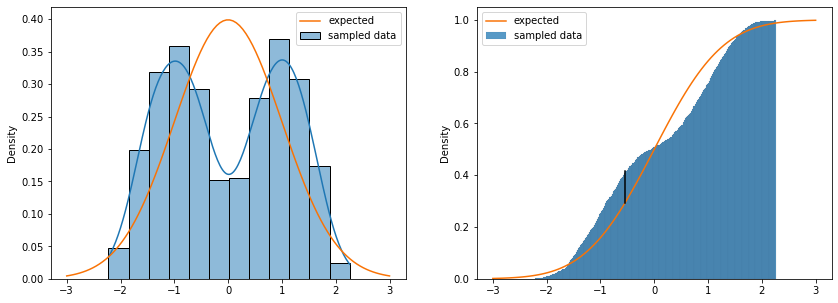

In [7]:
sampleSize=1000
sample = np.random.randn(sampleSize)*0.5 + 1 -2* (np.random.random(sampleSize)>0.5) 

# computing the observed CDF and comparing with what is expected under a normal distribution
cdfobserved = np.arange(1,len(sample)+1)/len(sample)
sample.sort()
cdfexpected = stats.norm.cdf(sample)

diff = abs(cdfexpected-cdfobserved)
positionMax = np.argmax(diff) 
maxDiff = diff[positionMax]
maxPos = sample[positionMax]

# plotting the pdf and cdf 
x = np.linspace(-3,3,100)
fig,axes = plt.subplots(1,2,figsize=(14,5))
sns.histplot( sample , label='sampled data' , stat='density', kde=True, ax = axes[0])
sns.lineplot( x=x , y=stats.norm.pdf(x) , color='xkcd:orange' , label='expected' , ax = axes[0])
          
sns.histplot(sample, bins = len(sample), stat='density', 
             cumulative=True, label='sampled data' , ax = axes[1] ).set_zorder(1)
sns.lineplot( x=x , y=stats.norm.cdf(x) , color='xkcd:orange' , label='expected' , ax = axes[1])
#adding a segment to visualize the KS statistic
axes[1].plot( [ maxPos , maxPos ] , [ cdfobserved[positionMax] , cdfexpected[positionMax] ] ,color='black')


In [8]:
# test :
ksStat , pvalue = stats.kstest( sample , stats.norm.cdf )
print('1-sample Kolmogorov-Smirnov test:')
print( 'KS test statistic :',ksStat )
print( 'p-value :',pvalue )

1-sample Kolmogorov-Smirnov test:
KS test statistic : 0.12028368042678317
p-value : 4.584136945442501e-13


And for 2 samples:

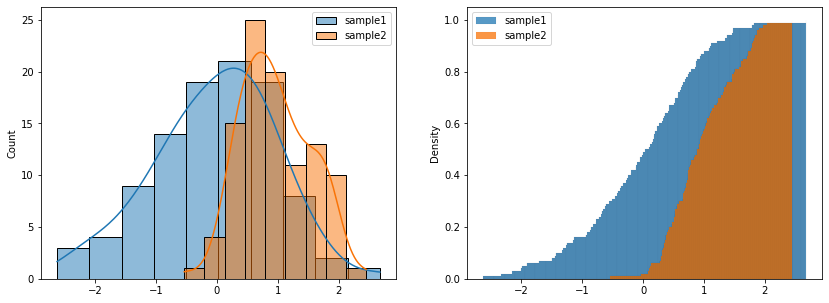

In [9]:
sampleSize=100
sample1 = np.random.randn(sampleSize)*1 
sample2 = np.random.randn(sampleSize)*0.6 + 1.0

# plotting the pdf and cdf 
fig,axes = plt.subplots(1,2,figsize=(14,5))
sns.histplot( sample1 , label='sample1' , kde=True , ax = axes[0])
sns.histplot( sample2 , label='sample2' ,  color='xkcd:orange' , kde=True , ax = axes[0])
axes[0].legend()
kwargs = {'cumulative': True}
sns.histplot(sample1, bins = len(sample), stat='density', 
             cumulative=True, kde=False, label='sample1' , ax = axes[1] )
sns.histplot(sample2, bins = len(sample), stat='density', 
             cumulative=True,  color='xkcd:orange', kde=False, label='sample2' , ax = axes[1] )

axes[1].legend()

In [10]:
# test :
ksStat , pvalue = stats.ks_2samp(sample1,sample2)
print('1-sample Kolmogorov-Smirnov test:')
print( 'KS test statistic :',ksStat )
print( 'p-value :',pvalue )

1-sample Kolmogorov-Smirnov test:
KS test statistic : 0.54
p-value : 1.0245697148897385e-13


The Kolmogorov-Smirnov is very useful because it is non parametric (i.e., less assumptions to check) and it accounts for variations in general and not only in location.

The reason we keep using the t-test when we want to compare locations is because the **KS test has a worse statistical power than the t-test**:

In [11]:
sampleSize=10
diff = 1.0
sigThreshold=0.05
N=1000

rejectedKS = 0
rejectedT = 0

for i in range(N):
    sample1 = np.random.randn(sampleSize) 
    sample2 = np.random.randn(sampleSize) + diff
    
    ## is the KS test able to find the difference ?
    ksStat , pvalue = stats.ks_2samp(sample1,sample2)
    if pvalue <= sigThreshold:
        rejectedKS+=1
    
    ## is the t-test able to find the difference ?
    tstat , pvalue = stats.ttest_ind(sample1,sample2)
    if pvalue <= sigThreshold:
        rejectedT+=1

print("Power for a difference in mean",diff, ', sample size',sampleSize,'and significance threshold',sigThreshold)
print('KS test',rejectedKS/N)
print('T test ',rejectedT /N)


Power for a difference in mean 1.0 , sample size 10 and significance threshold 0.05
KS test 0.24
T test  0.526


This is the case as well with tests of normality such as the Shapiro-Wilk test.

> You can think of it as the KS test being more generalistic, and performing a bit worse than specialised tests in their respective areas


[back to the toc](#toc)

<br>

# Exercise 02   <a id='5'></a>

In a previous exercise we used the t-test to detect a difference in the weight of mice subjected to different diets. This dataset presents another condition : `'genotype'`

Use the Kolmogorov-Smirnov test to determine if the distributions of mice weights differ between wild-type (`'WT'`) and mutant (`'KO'`) individuals.

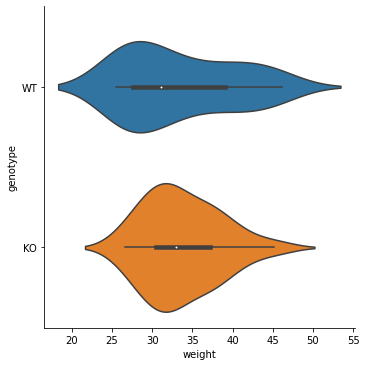

In [12]:
mice_data = pd.read_csv( 'data/mice_data.csv' ) # data about the weight of mices of different genotypes and subjected to different diets
sns.catplot(x='weight' , y='genotype' , data=mice_data , kind='violin')

In [13]:
sample1 = mice_data.weight[ mice_data.genotype == "WT" ]
sample2 = mice_data.weight[ mice_data.genotype == "KO" ]
ksStat , pvalue = stats.ks_2samp(sample1,sample2)
print('2-samplea Kolmogorov-Smirnov test:')
print( 'KS test statistic :',ksStat )
print( 'p-value :',pvalue )

2-samplea Kolmogorov-Smirnov test:
KS test statistic : 0.26282051282051283
p-value : 0.2892677124270361


In [ ]:
# %load solutions/solution_03_02.py
stat , pval = stats.ks_2samp( mice_data.loc[ mice_data.genotype=='WT' , 'weight'] , 
                mice_data.loc[ mice_data.genotype=='KO' , 'weight'])

print("KS test p-value :", pval)



[back to the toc](#toc)

<br>

## 3. Bartlett's test - testing variance equality  <a id='6'></a>

We have seen with the t-test how to check for mean equality. 
There also exists tests to test the equality of variance between different samples (also refered to as *homoscedasticity*).
Bartlett's test is one such test.

**assumptions:** Bartlett's presumes that the data is normally distributed (remember Shapiro-wilk's test in the previous notebook).

**Test hypothesis**: given $m$ groups of variances $\sigma^2_{1...m}$, , containing $n_1...m$ observations (for a total of $n$)
 * **Null hypothesis**: $H_0 = \sigma^2_1 = \sigma^2_2 = ... = \sigma^2_m$
 * **Alternative hypothesis**: At least one of these variance differ from the others

**Test statistic**

$$T = \frac{(n-m) ln(s^2_{pop}) - \sum (n_i-1)ln( s^2_i )}{1+\frac{1}{3(m-1)} ( \sum  \frac{1}{n_i-1}  - \frac{1}{n-m} ) }$$

Where

* $s^2_{i} = \frac{1}{n_i -1} \sum(x_i - \bar{x_i})^2$ is the *sample variance* 
* $s^2_{pop} = \sum \frac{n_i - 1}{n-m} s^2_i $ is the *pooled variance* estimate

Under the null hypothesis, the test statistic $T$ approximately follows a $\chi^2$ distribution with $m-1$ degrees of liberty.


Let's test this approximation:

In [ ]:
T = [] # will contain a sample of values of T under the null hypothesis
ni = 3
m=3
for i in range(10000):
    samples = [ np.random.randn(ni) for i in range(m)]
    stat, p = stats.bartlett(*samples)
    T.append(stat)

#performing a KS test to check if the test statistic follows the expected chi-square distribution
ksStat , pvalue = stats.kstest( T , lambda x : stats.chi2.cdf(x,df=m-1) )
print('Does T significantly differ from a Chi square distribution?')
print('\tp-value of KS test :',pvalue)
sns.displot(T , color='xkcd:avocado' , stat='density' , aspect=3, label="sampled Bartlett's test statistic")
x = np.linspace( 0,20,100 )
sns.lineplot( x=x , y=stats.chi2.pdf(x,df=m-1) , color='xkcd:tomato', linewidth=3 , label="expected Chi-square")

The approximation seems quite valid even when $n_i$ or $m$ are low.


When the data cannot be considered normal, other tests can be used such as the **Levene test** (see [`scipy.stats.levene`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html#scipy.stats.levene))


> Note : no exercise here, but don't be afraid : you will get to apply Bartlett's test in the next exercise!


[back to the toc](#toc)

<br>

## 4. 1-way anova  <a id='7'></a>

The ANOVA, or ANalyse Of VAriance, stands maybe among the most used (and abused) type of statistical tests to date.

The anova is used to analyze the differences among group means in a sample. 
In particular, we are going to concentrate here on the 1-way ANOVA, which evaluates the difference in means of a numerical variable across groups formed by another (single) variable.

In this sense, it is a generalization of the t-test which is limited to 2 groups only (in fact, the 1-way anova and t-test are quivalent when there are only 2 groups).

**Anova assumptions** :
* subpopulation distributions are normal
* samples have equal variances
* observations are independent from one another

**Test hypothesis** : 
given $m$ groups of mean $\bar{x}_{1...m}$, each containing $n_i$ observations (for a total of $n$)
 * **Null hypothesis** : $H_0 : \bar{x}_1 = \bar{x}_2 = ... = \bar{x}_m$
 * **Alternative hypothesis** : At least one of these means differ from the others
 
The anova relies on the idea that if the mean varies between the different group then the overall variance of all samples should be significantly greater than the variance within each group (hence the name).

Put a bit more formally, the anova is interested in the **sum of squared** differences with the mean (abbreviated SSq)

> remember that a variance is a normalised sum of squared difference with the mean


It relies on the decomposition :

$$ SS_{total} = SS_{within} + SS_{between} $$

Where:
* $ SS_{total} = \sum (x_{ij}-\bar{x})^2 $ is the sum of the SSq within the full data
* $ SS_{within} = \sum (x_{ij}-\bar{x_{i}})^2 $ is the sum of the SSq within each groups
* $ SS_{between} = \sum n_i * (\bar{x_{i}}-\bar{x})^2 $ is the SSq between groups

If $SS_{between} >> SS_{within}$ then the grouping explain 

The **test statistic** is:

$$ F = \frac{ SS_{between} / (m-1) }{ SS_{within} / (n-m) } $$

$(m-1)$ and $(n-m)$ corresponds to the **degrees of freedom**, repectively of the between and within group sum of squares.

Under the null hypothesis the test statistic follows an F-distribution with $(m-1)$ and $(n-m)$ degrees of freedom.




In [ ]:
# we have measures of the height of the same number of individuals in 3 plant subspecies

dfPlant = pd.read_table("data/Mendaxophytae_data_oct2020.csv",sep=',')
fig,axes = plt.subplots(1,2 , figsize=(14,7),  sharey=True )
sns.histplot(y=dfPlant['plantSize'] , kde=True ,  ax = axes[0] )
sns.rugplot(y=dfPlant['plantSize']  ,  ax = axes[0] )
sns.violinplot(x='subSpecies', y='plantSize' , data=dfPlant, kind = 'violin' , ax = axes[1])

In [ ]:
# compute the global mean 
grandMean = dfPlant['plantSize'].mean()

#compute the mean, group size and sum of square inside each group:
X = dfPlant.groupby('subSpecies')['plantSize'].agg(['mean','count'])
X['SumSquare'] = dfPlant.groupby('subSpecies')['plantSize'].apply( lambda  x : sum((x-x.mean())**2) )

X.head()

In [ ]:
# computing the total sum of square :
SumSqTotal = sum( (dfPlant['plantSize']-grandMean)**2 )

# computing the sum of square between groups :
SumSqBetween = sum( ( X['mean'] - grandMean )**2 * X['count'] )

# computing the sum of square within groups :
SumSqWithin = sum( X['SumSquare'] )

print('sum of squares:')
print('\tTotal  :',SumSqTotal)
print('\tWithin :',SumSqWithin)
print('\tBetween:',SumSqBetween)

print('\tTotal - (Between+Within):',SumSqTotal - (SumSqBetween + SumSqWithin) )

In [ ]:
#computing the degrees of freedom
numberOfGroups = X.shape[0]
DFbetween = numberOfGroups -1
DFwithin = len(dfPlant.index) - numberOfGroups

MeanSqWithin = SumSqWithin / DFwithin
MeanSqBetween = SumSqBetween / DFbetween

Fstat = MeanSqBetween/MeanSqWithin
pval = 1-stats.f.cdf(Fstat, DFbetween , DFwithin)

print('manual 1-way anova / F-test:')
print('F-stat :',Fstat)
print('p-value:',pval)

We get the same result using `scipy.stats` function:

In [ ]:
Fstat , pval = stats.f_oneway( dfPlant['plantSize'][dfPlant['subSpecies'] == 0],
                dfPlant['plantSize'][dfPlant['subSpecies'] == 1],
                dfPlant['plantSize'][dfPlant['subSpecies'] == 2] )
print('automated 1-way anova / F-test:')
print('F-stat :',Fstat)
print('p-value:',pval)




When the assumptions (normality, equality of variances) of the anova fail, you have several alternatives : 
* **normality OK, variances unequal : Welch's anova**, sadly absent from scipy (but requested by many, so maybe later); present in the recent pingouin package : [pingouin.welch_anova](https://pingouin-stats.org/generated/pingouin.welch_anova.html)
* **data not normal : Kruskall-Wallis H test**, a nonparametric test that check **median** equality. See
[scipy.stats.kruskall](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html).


[back to the toc](#toc)

<br>

# Exercise 03  <a id='8'></a>


The dataset `'stcp-Rdataset-Diet.csv'` contains information on the weights 
of 78 test subjects spread among 3 types of diets.

Here is how to read the data:

In [ ]:
df = pd.read_csv('data/stcp-Rdataset-Diet.csv')
df['weightDiff'] = df['weight6weeks'] - df['pre.weight']
df.describe()


Test if the diets are associated with a different weight difference on average. 
Be careful to test the assumptions of your test.


In [ ]:
# %load -r 1-6 solutions/solution_03_03.py



In [ ]:
# %load -r 7-25 solutions/solution_03_03.py


In [ ]:
# %load -r 26- solutions/solution_03_03.py


**Bonus exercise :** go back to the 1880 swiss census data. Is the main language spoken in a locality linked to the total number of inhabitant in town ?



[back to the toc](#toc)

<br>

## 5. Common probability distributions  <a id='9'></a>

As you have seen statistical tests rely on the definition of **how a test statistic is distributed under a null hypothesis**. 

Here is a list of some well described distributions that can be used to model specific random processes :


* **Bernoulli distribution** : two outcomes - 0 and 1 (e.g., a coin toss, where 0 = heads, 1 = tails). The outcomes do not have to be equally likely. 
    * $p$ represents the probability of "success" (getting outcome 1). 
* **Uniform distribution** : distribution over (possibly many) equally likely outcomes (e.g., rolling a fair die).
    * $a$ : lowest possible value
    * $b$ : highest possible value
* **Binomial distribution** : sum of outcomes of variables following a Bernoulli distribution (e.g., toss a coin 50 times and count the number of tails). 
    * $n$ - number of trials
    * $p$ - probability of "success" in each trial. 
    * Another common example: repeatedly drawing from an urn with a fixed number of white and black balls, putting back the drawn ball after each trial.
* **Multinomial distribution** : generalization of the binomial distribution to more than two outcomes per trial. 
    * $n$ - number of trials, 
    * $p_1, \ldots, p_k$ - success probabilities.
* **Hypergeometric distribution** : drawing from an urn, but without replacement (so that the probability of success changes between trials). Used in genomics e.g. for gene set/overrepresentation analysis. There the "urn" consists of all genes, the trial is to "draw" a gene (typically by calling it significantly differentially expressed), and a "success" is declared if the gene comes from a pre-specified gene set. 
    * $n$ - number of trials
    * $N$ - original population size
    * $K$ - number of available "success states" in the population.
* **Poisson distribution** : distribution of the count of times that something happens along a fixed amount of time. 
    * $\lambda$ - average "rate". 
    * Limiting distribution of the binomial, as $n$ goes to infinity and $p$ goes to zero so that $np$ stays constant. 
* **Geometric distribution** : models the "number of failures until the first success". 
    * $p$ - probability of success in each trial. 
* **Negative Binomial distribution** : number of failures until $r$ successes have occurred. 
    * $p$ - probability of success in each trial
    * $r$ - desired number of successes. 
    * Can also be obtained as the marginal distribution of a Poisson variable, where the rate is not constant but follows a gamma distribution. 
* **Normal distribution** : ubiquitous! 
    * $\mu$ - mean
    * $\sigma$ - standard deviation
* **Log-normal distribution** : a variable where the logarithm is normally distributed. 
* **Chi-square distribution** : the distribution of a sum of squares of normally distributed variables. 


For more information, see e.g. 
[https://www.johndcook.com/blog/distribution_chart/](https://www.johndcook.com/blog/distribution_chart/),  
[https://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/](https://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/) or
[http://www.math.wm.edu/~leemis/2008amstat.pdf](http://www.math.wm.edu/~leemis/2008amstat.pdf).
